In [2]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot as up
import pandas as pd
import os

$k_i = k_f - q$

In [3]:
# file_dir = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_09/Run_1_single_pion/"
file_dir = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_15/"
num_files = len([name for name in os.listdir(file_dir) if not os.path.isdir(name)])
file_names = [(file_dir + name) for name in os.listdir(file_dir) if not os.path.isdir(name)]
# file_names = file_names[:6]

In [4]:
MC_low = RDataFrame("tree_low", file_names)
# MC_high = RDataFrame("tree_high", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_09/Run_1_single_pion/*.root")
MC_high = RDataFrame("tree_high", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_15/*.root")
driver_high = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_9_new_R2_driver_all_files_high.root")
driver_low = RDataFrame("tree_driver", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_9_new_R2_driver_6_files_low.root")

In [5]:
MC_file_dir = "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_09/Run_1_single_pion/"
tree_MC_list = []
for name in os.listdir(MC_file_dir):
    tree_MC_list.append(up.open(MC_file_dir + name + ":tree_maxmin"))
tree_driver = up.open("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_9_new_R2_driver_all_files_high.root:tree_max")

In [6]:
for i in range(len(tree_MC_list)):
    tree_MC = tree_MC_list[i]
    if(i == 0):
        MC_R0_hist_max = tree_MC["R0_max"].array(library='np')[0]
        MC_R1_hist_max = tree_MC["R1_max"].array(library='np')[0]
        MC_R2_hist_max = tree_MC["R2_max"].array(library='np')[0]

        MC_R0_hist_min = tree_MC["R0_min"].array(library='np')[0]
        MC_R1_hist_min = tree_MC["R1_min"].array(library='np')[0]
        MC_R2_hist_min = tree_MC["R2_min"].array(library='np')[0]
    else:
        MC_R0_hist_max = max(MC_R0_hist_max,tree_MC["R0_max"].array(library='np')[0])
        MC_R1_hist_max = max(MC_R1_hist_max,tree_MC["R1_max"].array(library='np')[0])
        MC_R2_hist_max = max(MC_R2_hist_max,tree_MC["R2_max"].array(library='np')[0])

        MC_R0_hist_min = min(MC_R0_hist_min,tree_MC["R0_min"].array(library='np')[0])
        MC_R1_hist_min = min(MC_R1_hist_min,tree_MC["R1_min"].array(library='np')[0])
        MC_R2_hist_min = min(MC_R2_hist_min,tree_MC["R2_min"].array(library='np')[0])
driver_R0_hist_max = tree_driver["R0_hist_max"].array(library='np')[0]
driver_R1_hist_max = tree_driver["R1_hist_max"].array(library='np')[0]
driver_R2_hist_max = tree_driver["R2_hist_max"].array(library='np')[0]

driver_R0_hist_min = tree_driver["R0_hist_min"].array(library='np')[0]
driver_R1_hist_min = tree_driver["R1_hist_min"].array(library='np')[0]
driver_R2_hist_min = tree_driver["R2_hist_min"].array(library='np')[0]



In [7]:
nBins_MC = 1000
nBins_MC_R1 = 10000000
# Calculate common bin width
binWidth_R0 = MC_R0_hist_max / nBins_MC
binWidth_R1 = MC_R1_hist_max / nBins_MC_R1
binWidth_R2 = MC_R2_hist_max / nBins_MC

nBins_driver_R0 = int(driver_R0_hist_max // binWidth_R0)
nBins_driver_R1 = int(driver_R1_hist_max // binWidth_R1)
nBins_driver_R2 = int(driver_R2_hist_max // binWidth_R2)

## Particular bins

### Bin 0: high TMD aff
### Bin 1: low TMD aff

In [8]:
histo_name = ["high TMD aff bin", "low TMD aff bin"]

#histo limits
R0_lim = [1,1.8]
R1_lim = [1.5,3.5]
R2_lim = [1,3]

x_bins = [0.1, 0.06]
Q2_bins = [3.5, 1.77]
z_bins = [0.725, 0.75]
pT_bins = [0.0225, 1.01]
expected_TMD_aff = [0.5525, 0.005]

# x_tol = [0.03, 0.01]
# z_tol = [0.1, 0.1]
# pT_tol = [0.01, 0.1]
# Q2_tol = [0.5, 0.4]

x_tol = [1, 1]
z_tol = [1, 1]
pT_tol = [1, 1]
Q2_tol = [1, 1]
driver_format = "x.x_t <= {} && x.x_t > {} && z.z_t <= {} && z.z_t > {} && pT.pT_t <= {} && pT.pT_t > {} && Q2.Q2_t <= {} && Q2.Q2_t > {}"
MC_format = "x <= {} && x > {} && z <= {} && z > {} && pT <= {} && pT > {} && Q2 <= {} && Q2 > {}"

In [9]:
nBins_driver_R0_binned = int(np.floor(nBins_driver_R0 / 10)) 
nBins_driver_R1_binned = int(np.floor(nBins_driver_R1 / 10)) 
nBins_driver_R2_binned = int(np.floor(nBins_driver_R2 / 10)) 

nBins_MC_binned = int(np.floor(nBins_MC / 10)) 
nBins_MC_R1_binned = int(np.floor(nBins_MC_R1 / 10)) 

In [ ]:
driver_frames = []
MC_frames = []
for i in range(2):
    if(i == 0):
        MC_use = MC_high
        driver_use = driver_high
    else:
        MC_use = MC_low
        driver_use = driver_low
    driver_binned = driver_use.Filter("R0.R0_t > 0 && R0.R0_t < 5").Filter("R1.R1_t > 0 && R1.R1_t < 5").Filter("R2.R2_t > 0 && R2.R2_t < 5")
    MC_binned = MC_use.Filter("R0 > 0 && R0 < 5").Filter("R1 > 0 && R1 < 5").Filter("R2_adjust > 0 && R2_adjust < 5")
#     driver_binned = driver_binned.Filter(driver_format.format((x_bins[i] + x_tol[i]),(x_bins[i] - x_tol[i]),(z_bins[i] + z_tol[i]),(z_bins[i] - z_tol[i]),(pT_bins[i] + pT_tol[i]),(pT_bins[i] - pT_tol[i]),(Q2_bins[i] + Q2_tol[i]),(Q2_bins[i] - Q2_tol[i])))
#     MC_binned = MC_binned.Filter(MC_format.format((x_bins[i] + x_tol[i]),(x_bins[i] - x_tol[i]),(z_bins[i] + z_tol[i]),(z_bins[i] - z_tol[i]),(pT_bins[i] + pT_tol[i]),(pT_bins[i] - pT_tol[i]),(Q2_bins[i] + Q2_tol[i]),(Q2_bins[i] - Q2_tol[i])))
    driver_count = driver_use.Count().GetValue()
    MC_count = MC_use.Count().GetValue()
    
    n_bins_driver = 100
    bin_weight_driver = driver_count / n_bins_driver
    n_bins_MC = int(round(MC_count / bin_weight_driver))
    print(f"num bins MC: {n_bins_MC}")
    
    # Define histograms with common bin width
    d = driver_binned.Histo1D(("d", f"R0 {histo_name[i]} ;R0 ;Counts", n_bins_driver, 0, R0_lim[i]), "R0.R0_t")
    d1 = driver_binned.Histo1D(("d1",f"R1 {histo_name[i]} ;R1 ;Counts",n_bins_driver,0,R1_lim[i]),"R1.R1_t")
    d2 = driver_binned.Histo1D(("d2",f"new R2 {histo_name[i]} ;R2 ;Counts",n_bins_driver,0,R2_lim[i]),"R2.R2_t")


    calc = MC_binned.Histo1D(("calc", f"R0 {histo_name[i]} ;R0 ;Counts", n_bins_MC, 0, R0_lim[i]), "R0")
    calc1 = MC_binned.Histo1D(("calc1",f"R1 {histo_name[i]} ;R1 ;Counts",n_bins_MC,0,R1_lim[i]),"R1")
    calc2 = MC_binned.Histo1D(("calc2",f"new R2 {histo_name[i]};R2_adjust ;Counts",n_bins_MC,0,R2_lim[i]),"R2_adjust")

    calc_dum = TH1F("","",1,0,1);
    calc_dum.SetLineColor(2);
    d_dum = TH1F("","",1,0,1);
    d_dum.SetLineColor(4);
    calc.SetLineColor(2)
    d.SetLineColor(4)
    calc1.SetLineColor(2)
    d1.SetLineColor(4)
    calc2.SetLineColor(2)
    d2.SetLineColor(4)

    legend = ROOT.TLegend (0.7 ,0.6 ,0.85 ,0.75)
    legend.AddEntry(calc_dum, "MC" ,"l")
    legend.AddEntry(d_dum, "Generated","l" )
    legend.SetLineWidth(0)

#     calc.GetXaxis().SetRangeUser(0,1.4)
#     calc1.GetXaxis().SetRangeUser(0,3)
#     calc2.GetXaxis().SetRangeUser(0,1.4)
#     d1.GetXaxis().SetRangeUser(0,3)
#     calc.GetYaxis().SetRangeUser(0,100000)
#     calc1.GetYaxis().SetRangeUser(0,100000)
#     calc2.GetYaxis().SetRangeUser(0,100000)

    if(i == 0):
        c = TCanvas("c","c")
        c.Divide(2,2)
        c.cd(1)
        calc.Draw("histo")
        d.Draw("same")
        legend.Draw("same")
        c.cd(2)

        calc1.Draw("histo")
        d1.Draw("same")

        legend.Draw("same")
        c.cd(3)
        d2.Draw("histo")
        calc2.Draw("same")
        legend.Draw("same")
    else:
        c = TCanvas("c","c")
        c.Divide(2,2)
        c.cd(1)
        d.Draw("histo")
        calc.Draw("same")
        legend.Draw("same")
        c.cd(2)

        d1.Draw("histo")
        calc1.Draw("same")

        legend.Draw("same")
        c.cd(3)
        d2.Draw("histo")
        calc2.Draw("same")
        legend.Draw("same")
    c.Draw()
#     c.Print(f"./Histos/Ratios/newR2_bin{i}_no_kin_cut.pdf")

total events: 923733

In [ ]:
dir(tabs)

Error in <THashList::Delete>: A list is accessing an object (0x5607a79003f0) already deleted (list name = THashList)


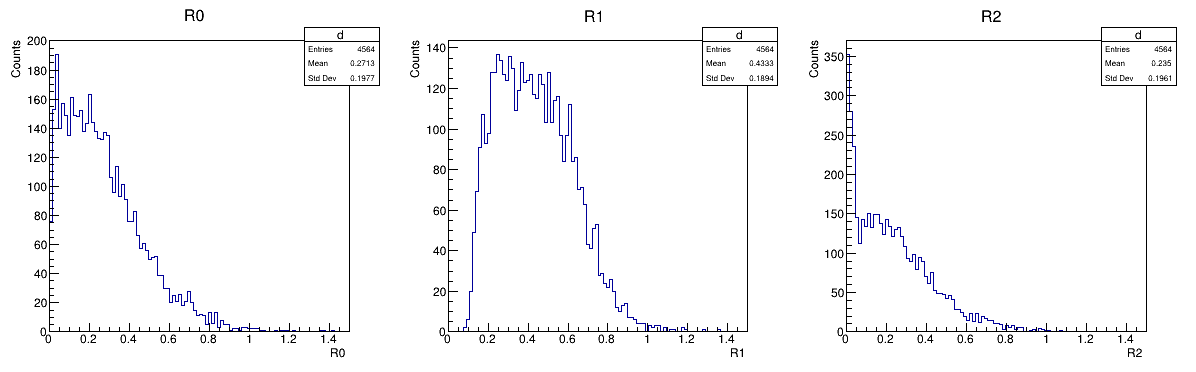

In [18]:
c = TCanvas("c","c", 1200, 400)
c.Divide(3,1)
MC = RDataFrame("tree_low", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_15/low_high.root")
R0 = MC.Histo1D(("d", "R0  ;R0 ;Counts", 100, 0, 1.5), "R0")
R1 = MC.Histo1D(("d", "R1  ;R1 ;Counts", 100, 0, 1.5), "R1")
R2 = MC.Histo1D(("d", "R2  ;R2 ;Counts", 100, 0, 1.5), "R2")
c.cd(1)
R0.Draw()
c.cd(2)
R1.Draw()
c.cd(3)
R2.Draw()
c.Draw()


Error in <THashList::Delete>: A list is accessing an object (0x5607a567dc10) already deleted (list name = THashList)


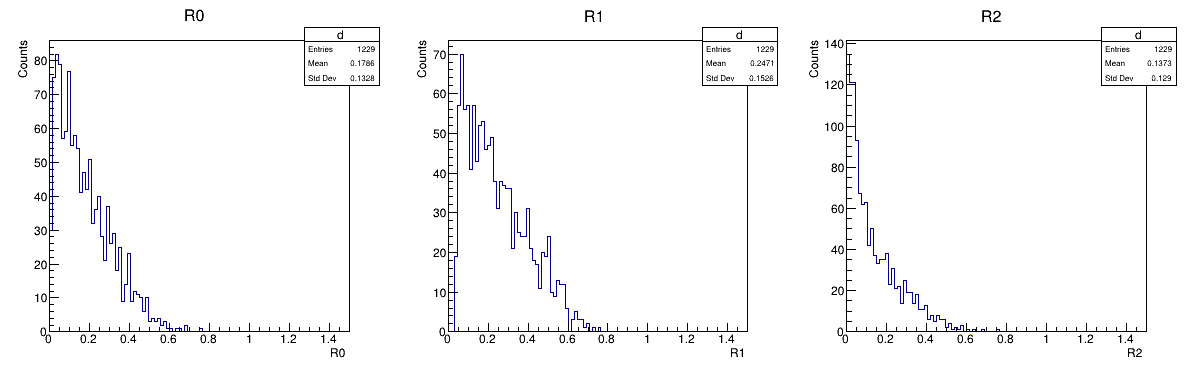

In [20]:
c = TCanvas("c","c", 1200, 400)
c.Divide(3,1)
MC = RDataFrame("tree_high", "/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Files_Spring_24/July_15/low_high_run_2.root")
R0 = MC.Histo1D(("d", "R0  ;R0 ;Counts", 100, 0, 1.5), "R0")
R1 = MC.Histo1D(("d", "R1  ;R1 ;Counts", 100, 0, 1.5), "R1")
R2 = MC.Histo1D(("d", "R2  ;R2 ;Counts", 100, 0, 1.5), "R2")
c.cd(1)
R0.Draw()
c.cd(2)
R1.Draw()
c.cd(3)
R2.Draw()
c.Draw()
